<img src="https://www.nlab.org.uk/wp-content/uploads/nlabmain.png" style="width:40%; clear:both; margin-bottom:-20px" align=left>

<br style="clear:both;"/>

## Analytics Specializations & Applications - Week 2

# Charge-off Analysis - Capital One Example Case Study
----------
Dr Georgiana Nica-Avram - University of Nottingham
[mail](mailto:georgiana.nica-avram1@nottingham.ac.uk)

In this task we are going to build on the last tutorial you did in FBA by looking at an example from Capital One.

Recall the task - when Capital One's customers come in financial difficulties, they risk having to "write-off" their debt (losing the company money). Now, that fall into financial problems does not usually happen at once, and Capital One try to predict when it might happen, so that they can intervene.

There are several indicators which can be used to anticipate the final outcome, such as late payments, calls to the customer services, enquiries about the products, a different browsing pattern on the web or mobile app. By using these features in our analysis, it can be possible to prevent, or at least guide the process and provide a better service for the customer as well as reduce risks for companies like Capital One.

## Scenario:
We are going to start by re-acquainting yourselves with Python and sklearn (which we will continue to use for the whole of the ASA module!). We are going to predict defaulting, but the objective is very much to cement the knowledge you should already have with a real world application.

As such you need to ensure that you have a good grasp of this exercise before next week. Credit analytics was selected to start us off on the course given that it is a specialization where they predominantly apply concepts we've already learned - however they are rapidly branching out to media and text mining analytics, which are coming up soon.

Ok, so a dataset containing some historical features for a range of customers is availabe on the ASA moodle site (credit_card_history.csv), and we will unpick those in order to produce a model that can help the credit agency recognize that the "charge-off" might be ahead for any particular customer.

### Task 1: Preparing the data
First, we need to download (as we are using Google Colaboratory), examine and prepare our dataset ("credit_card_history.csv"). I have left in the code to do this below in several instances, so you can fast track through it - but ensure that you *understand* what it is doing.

<span style="font-weight:bold; color:green;">&rarr; Your first task is to complete the script below, load in the dataset and put the input features and output features (the last field in the file) into their own variables, X and Y respectively:<span/>

Refer to previous examples from FBA if needed... but better still look up the pandas read_csv documentation on Google.

In [1]:
# When using Google Colaboratory, we will need to download the CSV file first,
# so that it is available in our 'cloud' space.
# If you are doing the practical on your laptop with Jupyter, you will need to
# download the file from Moodle and point read_csv() to it, as usual.

# This next line is only to be used on Google Colaboratory and will download the CSV file for you
!wget -O week2_data.zip "https://drive.google.com/uc?export=download&id=1TwntbbrqKRfIZwGDMgwkvEpRJj8FtsTD"
!unzip week2_data.zip

# We can then check that the file is here by listing the content of the current directory
!ls

--2026-02-06 10:48:26--  https://drive.google.com/uc?export=download&id=1TwntbbrqKRfIZwGDMgwkvEpRJj8FtsTD
Resolving drive.google.com (drive.google.com)... 142.250.117.113, 142.250.117.102, 142.250.117.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.117.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1TwntbbrqKRfIZwGDMgwkvEpRJj8FtsTD&export=download [following]
--2026-02-06 10:48:26--  https://drive.usercontent.google.com/download?id=1TwntbbrqKRfIZwGDMgwkvEpRJj8FtsTD&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 192.178.223.132, 2a00:1450:4009:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|192.178.223.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1340227 (1.3M) [application/octet-stream]
Saving to: ‘week2_data.zip’

week2_data.zip      100%[===================>]   1.28M  --

In [2]:
import pandas

#-- load in the data
filename = "credit_card_history.csv"
data = pandas.read_csv(filename)

#-- let's have a look at the features
X = data[data.columns[:-1]]
Y = data[data.columns[-1]]

print("Number of datapoints:", X.shape[0])
print("Number of input features:", X.shape[1])

Number of datapoints: 30000
Number of input features: 23


### Task 2a:  Examining the credit card data
Great. As before you should see we have 23 features and 30,000 datapoints (i.e. histories of 30,000 customers). Use your knowledge of pandas dataframes to print out the head of the file - the first 5 lines should do:

In [4]:
#-- this you should definitely remember how to do!
data.head(5)

,LIMIT,SEX,EDUCATION,MARRIAGE,AGE,STATUS_JAN,STATUS_FEB,STATUS_MAR,STATUS_APR,STATUS_MAY,...,BILL_APR,BILL_MAY,BILL_JUN,PAY_JAN,PAY_FEB,PAY_MAR,PAY_APR,PAY_MAY,PAY_JUN,DEFAULTED
0,500,2,2,1,24,2,2,-1,-1,-2,...,0.000,0.000,0.000,0.000,16.536,0.0,0.000,0.000,0.0,1
1,2900,2,2,2,26,-1,2,0,0,0,...,78.528,82.920,78.264,0.000,24.000,24.0,24.000,0.000,48.0,1
2,1700,1,2,2,30,1,2,2,0,0,...,1602.768,867.288,885.456,76.800,0.000,72.0,72.000,36.000,0.0,1
3,500,1,1,2,24,0,0,2,2,2,...,440.112,429.720,458.496,76.800,0.000,36.0,0.000,39.600,0.0,1
4,2900,2,2,1,39,-1,-1,-1,-1,-1,...,0.000,15.168,7.584,7.584,7.584,0.0,15.168,7.584,0.0,1


You'll have noticed that the target class "DEFAULTED" is a binary variable and already in the format we need, which is great. The rest of the schema is as follows:

In [ ]:

#    ----------------------------------------------------------------------------------------
#    Name                 Description
#    -------------------- -------------------------------------------------------------------
#    LIMIT                Credit limit available to the customer (£):
#
#    SEX                  Gender (1 = male; 2 = female)
#
#    EDUCATION            Education (1 = postgrad; 2 = undergrad; 3 = high school; 4 = others)
#
#    MARRIAGE             Marital status (1 = married; 2 = single; 3 = others)
#
#    AGE                  Age (years)
#
#    STATUS_[]            How far or ahead the credit card holder was on their payments for
#                         each month from JAN to JUN (giving us 5 fields here). The measurement
#                          is in months, as follows:
#                         -1 = one month ahead of payments
#                         0 = up to date with payments
#                         1 = one month behind on payments
#                         2 = two months behind on payments
#                         ...
#
#    BILL_[]              Amount on the credit card statement for the specified month, from
#                         JAN to JUN (£), so again 5 fields.
#
#    PAY_[]               Amount the credit card holder paid that month, from JAN to JUN (£).
#
#    DEFAULTED            Whether the credit card user then went on to default the next month
#                         (0 = no, 1 = yes)
#    ----------------------------------------------------------------------------------------


In [5]:
data.dtypes

LIMIT           int64
SEX             int64
EDUCATION       int64
MARRIAGE        int64
AGE             int64
STATUS_JAN      int64
STATUS_FEB      int64
STATUS_MAR      int64
STATUS_APR      int64
STATUS_MAY      int64
STATUS_JUN      int64
BILL_JAN      float64
BILL_FEB      float64
BILL_MAR      float64
BILL_APR      float64
BILL_MAY      float64
BILL_JUN      float64
PAY_JAN       float64
PAY_FEB       float64
PAY_MAR       float64
PAY_APR       float64
PAY_MAY       float64
PAY_JUN       float64
DEFAULTED       int64
dtype: object

I've left this as a comment, as it's always useful to have the description of elements in your code for future reference. I recommend you do this yourself too, as it saves a lot of looking up schemas in other documents.


### Task 2b: Tidying up the different feature categories
These fields fit into different categories. The first 5 fields let's call "demographics" (despite including "limit" too), then fields 5 to 10 the "statuses" for the last five months available, fields 11-16 are the "bills" for each of the last 5 months, and then finally we have payments.

<span style="font-weight:bold; color:green;">&rarr; Separate some field names into their own lists - this will be useful later:<span/>


In [6]:
#-- just to help us analyse let's set up some column name sets
demographics = data.columns[0:5]
statuses = data.columns[5:10]
bills =  data.columns[10:17]
payments = data.columns[17:23]

#-- have a look at the demographic features
data[demographics].head(5)

#-- now let's consider the payment status histories for the last 6 months
data[statuses].head(10)

,STATUS_JAN,STATUS_FEB,STATUS_MAR,STATUS_APR,STATUS_MAY
0,2,2,-1,-1,-2
1,-1,2,0,0,0
2,1,2,2,0,0
3,0,0,2,2,2
4,-1,-1,-1,-1,-1
5,2,0,0,2,2
6,-2,-2,-2,-2,-2
7,1,-2,-1,-1,-1
8,2,0,0,0,0
9,1,-1,-1,-2,-2


### Task 2c: Summarizing the data with Graphs

Great, now let's get a sense of the variables visually. This is really easy in a script, but it's a bit fiddly, so as before I've done it inline for you below.

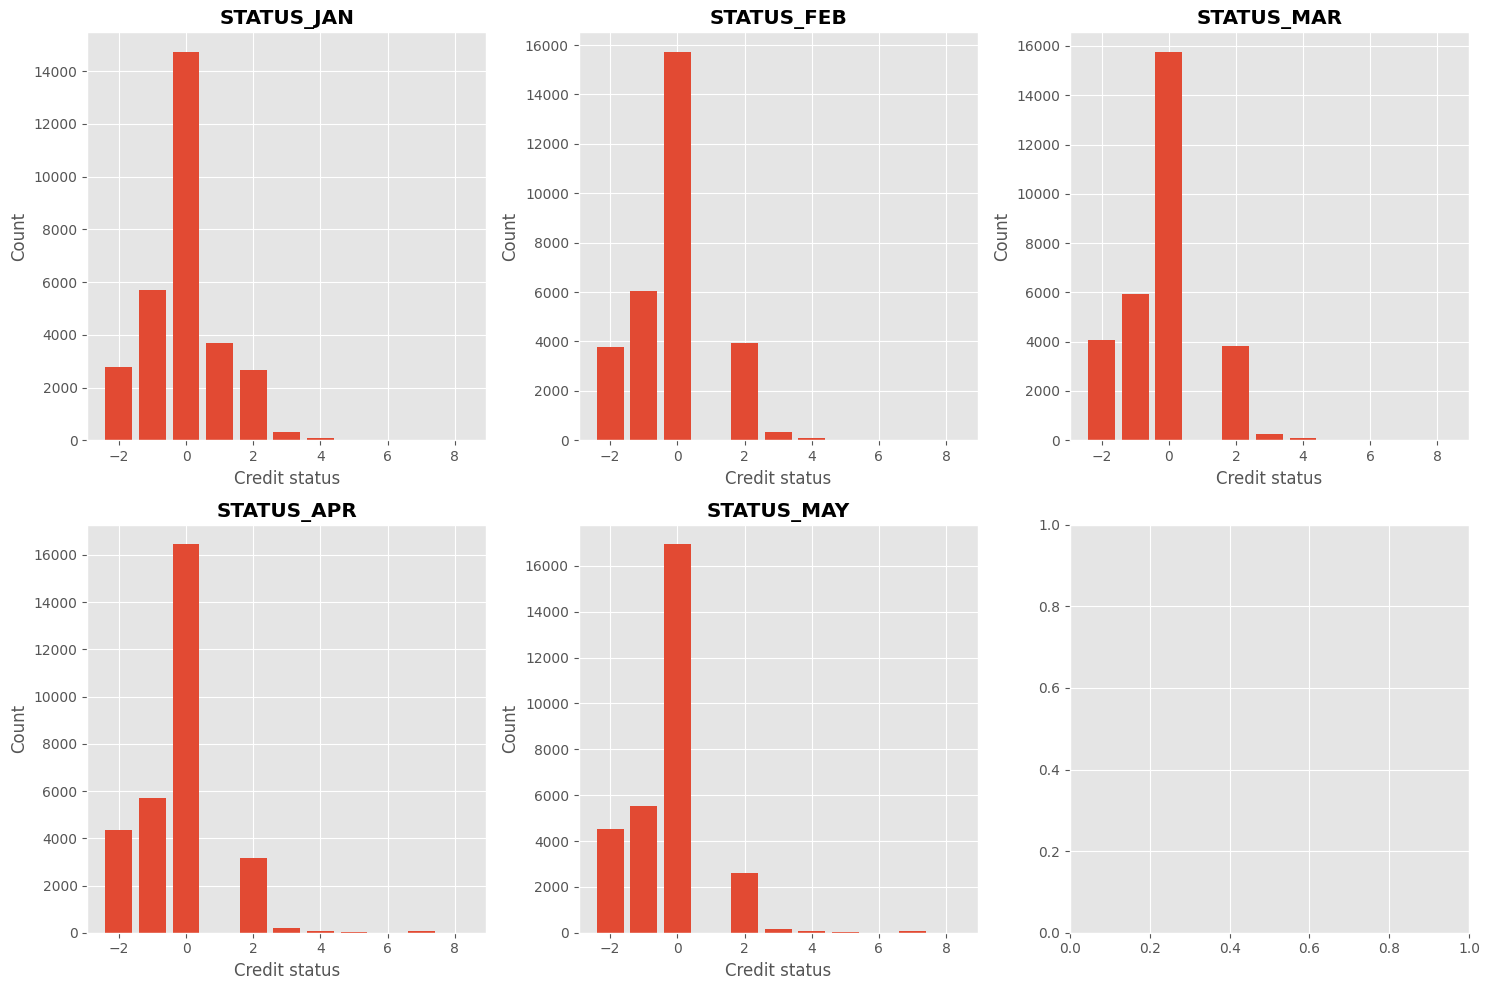

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Use a nice style
plt.style.use('ggplot')

# Set default figure parameters
plt.rcParams.update({
    'figure.figsize': (15, 10),
    'font.size': 10
})

# Setup the layout - calculate rows needed dynamically
n_features = len(statuses)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten axes array for easier iteration
axes = axes.flatten() if n_features > 1 else [axes]

# Loop through each feature and plot counts
for idx, feature in enumerate(statuses):
    # Get value counts for the current feature
    counts = data[feature].value_counts()

    # Create bar chart on the current axis
    axes[idx].bar(counts.index, counts.values, align='center')
    axes[idx].set_title(feature, fontweight='bold')
    axes[idx].set_xlabel('Credit status')
    axes[idx].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Really make sure you understand what this code is doing - play around with it, find out what "enumerate" does and ensure you understand what the loop is doing. Once you do, create some graphs yourself, but this time for the "payments" columns using the boxplot way of displaying continous variables.

<span style="font-weight:bold; color:green;">&rarr; Create some more graphs here yourself, but this time for the "payments" columns:</span>

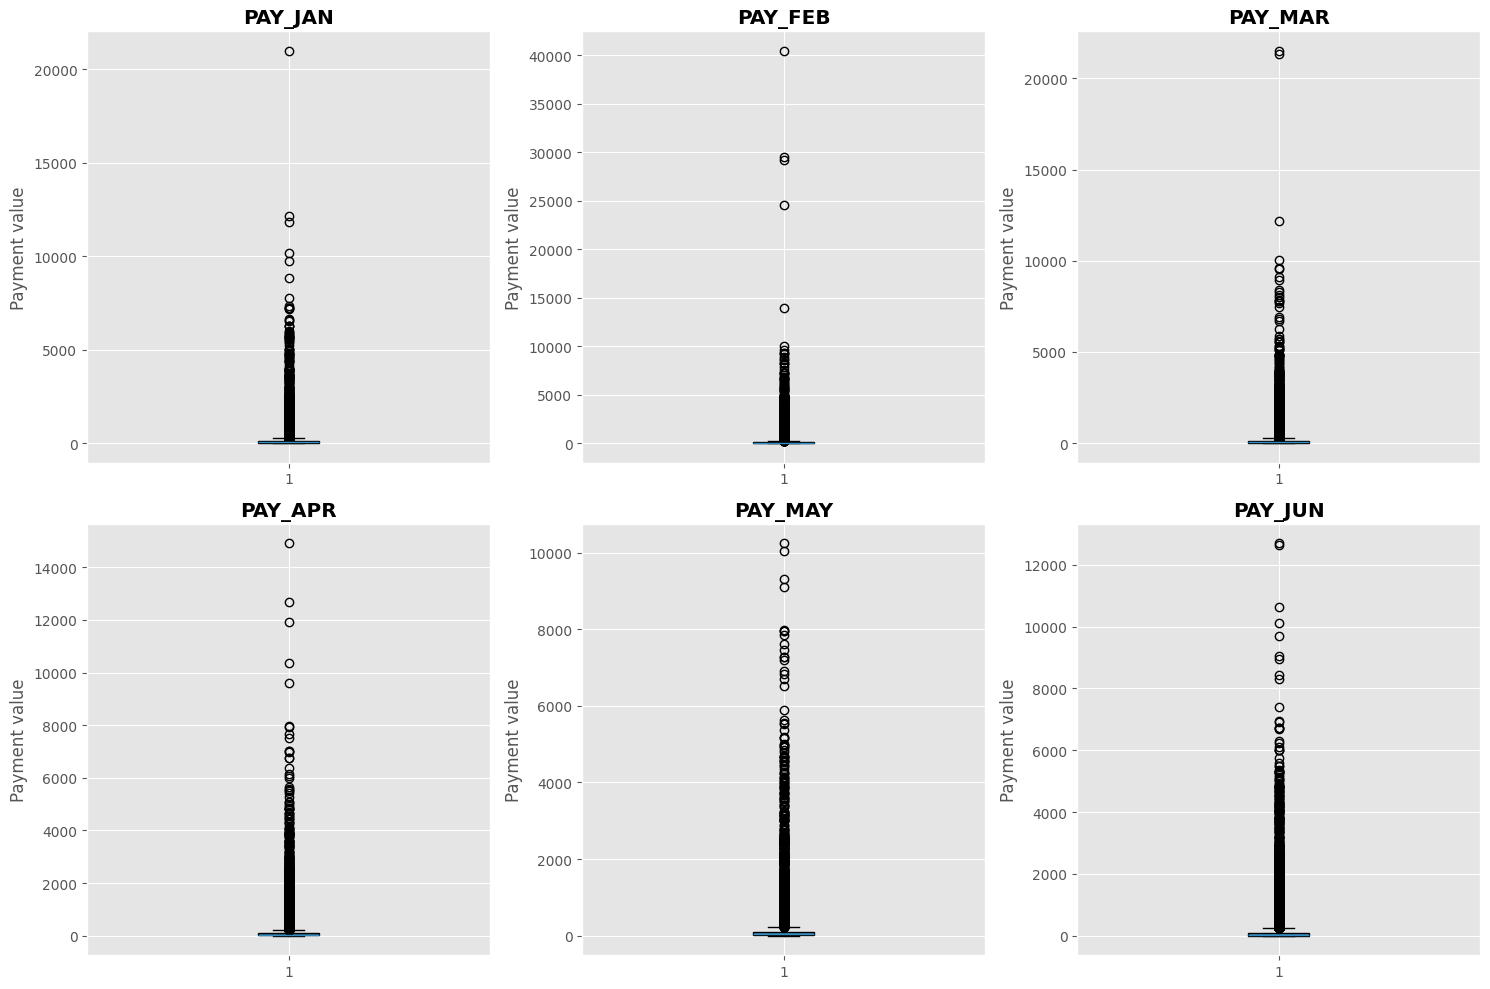

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Use a nice style
plt.style.use('ggplot')

# Set default figure parameters
plt.rcParams.update({
    'figure.figsize': (15, 10),
    'font.size': 10
})

# Setup the layout
n_features = len(payments)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten axes array for easier iteration
axes = axes.flatten() if n_features > 1 else [axes]

# Loop through each payment feature and create boxplots
for idx, feature in enumerate(payments):
    axes[idx].boxplot(
        data[feature].dropna(),
        vert=True,
        patch_artist=True
    )
    axes[idx].set_title(feature, fontweight='bold')
    axes[idx].set_ylabel('Payment value')

# Remove empty subplots (if any)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


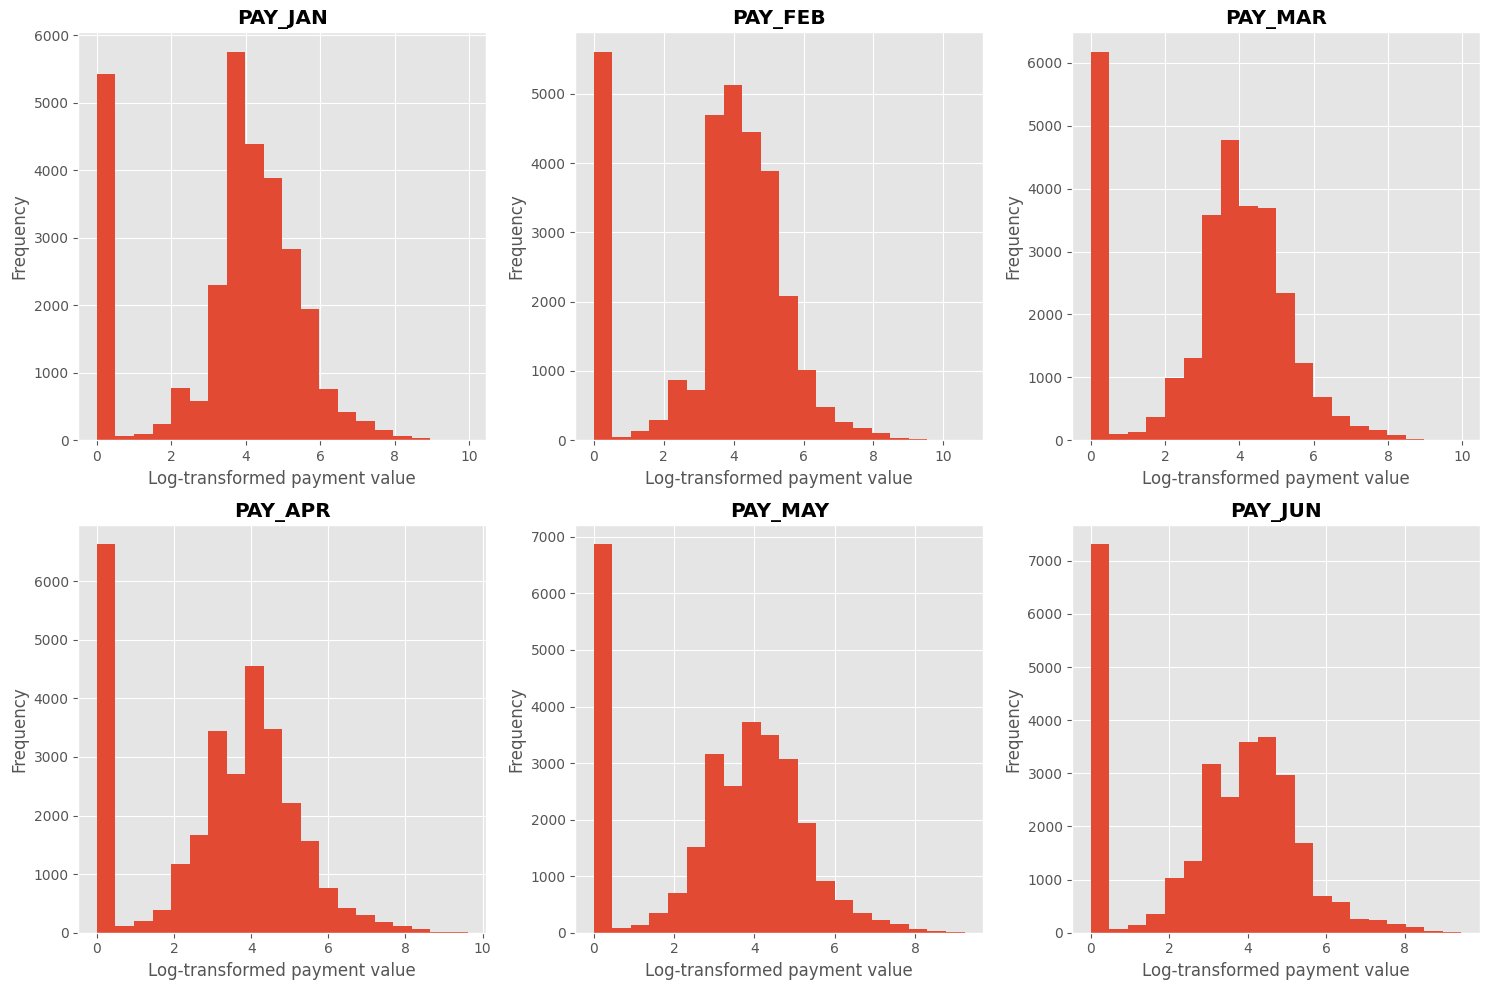

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Use a nice style
plt.style.use('ggplot')

# Set default figure parameters
plt.rcParams.update({
    'figure.figsize': (15, 10),
    'font.size': 10
})

# Setup the layout
n_features = len(payments)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten axes array for easier iteration
axes = axes.flatten() if n_features > 1 else [axes]

# Loop through each payment feature and plot histogram
for idx, feature in enumerate(payments):
    # Log transform the data to handle large scale
    log_data = np.log1p(data[feature].dropna())

    axes[idx].hist(log_data, bins=20)
    axes[idx].set_title(feature, fontweight='bold')
    axes[idx].set_xlabel('Log-transformed payment value')
    axes[idx].set_ylabel('Frequency')

# Remove unused subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


### Task 2d: Creating Histograms
Again, let's make some histograms too - they paint a great picture of the distribution of the data. Look up the matplotlib hist() function on Google and produce one.

<span style="font-weight:bold; color:green;">&rarr; Plot a histogram of the average bill amount</span>

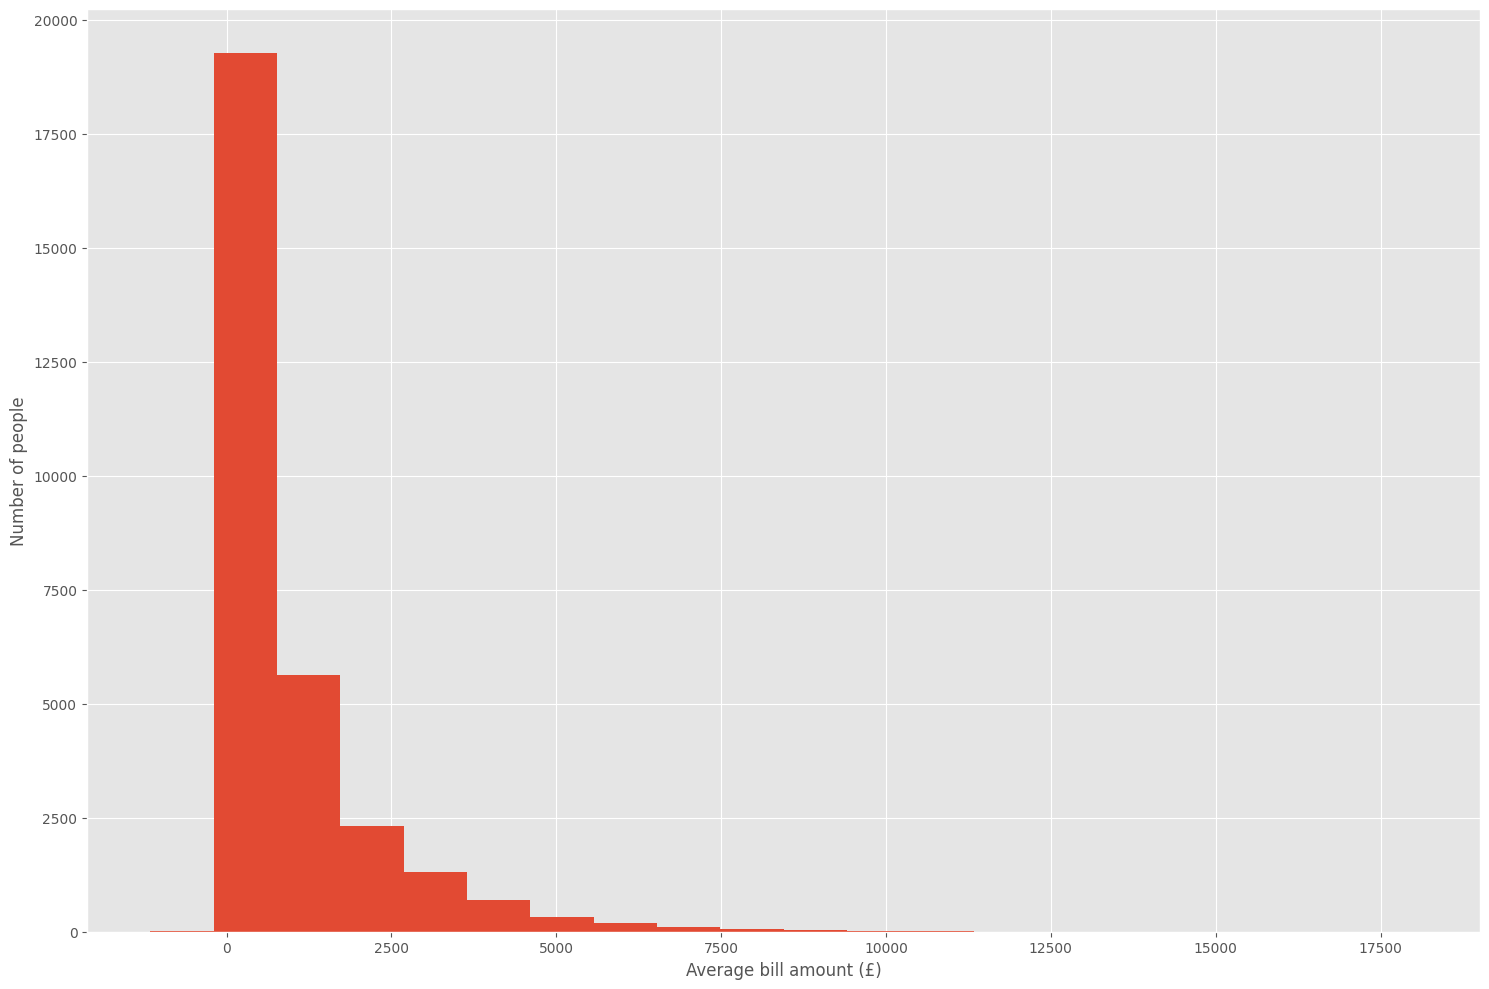

In [13]:
#-- for each person what's the average bill on their account each month?
plt.rcParams.update({
    'figure.figsize': (15, 10),
    'font.size': 10
})

#-- add your histogram line here!
plt.hist(data[bills].mean(axis=1), 20)

#-- some labelling.
plt.xlabel("Average bill amount (£)")
plt.ylabel("Number of people")

plt.tight_layout()
plt.show()


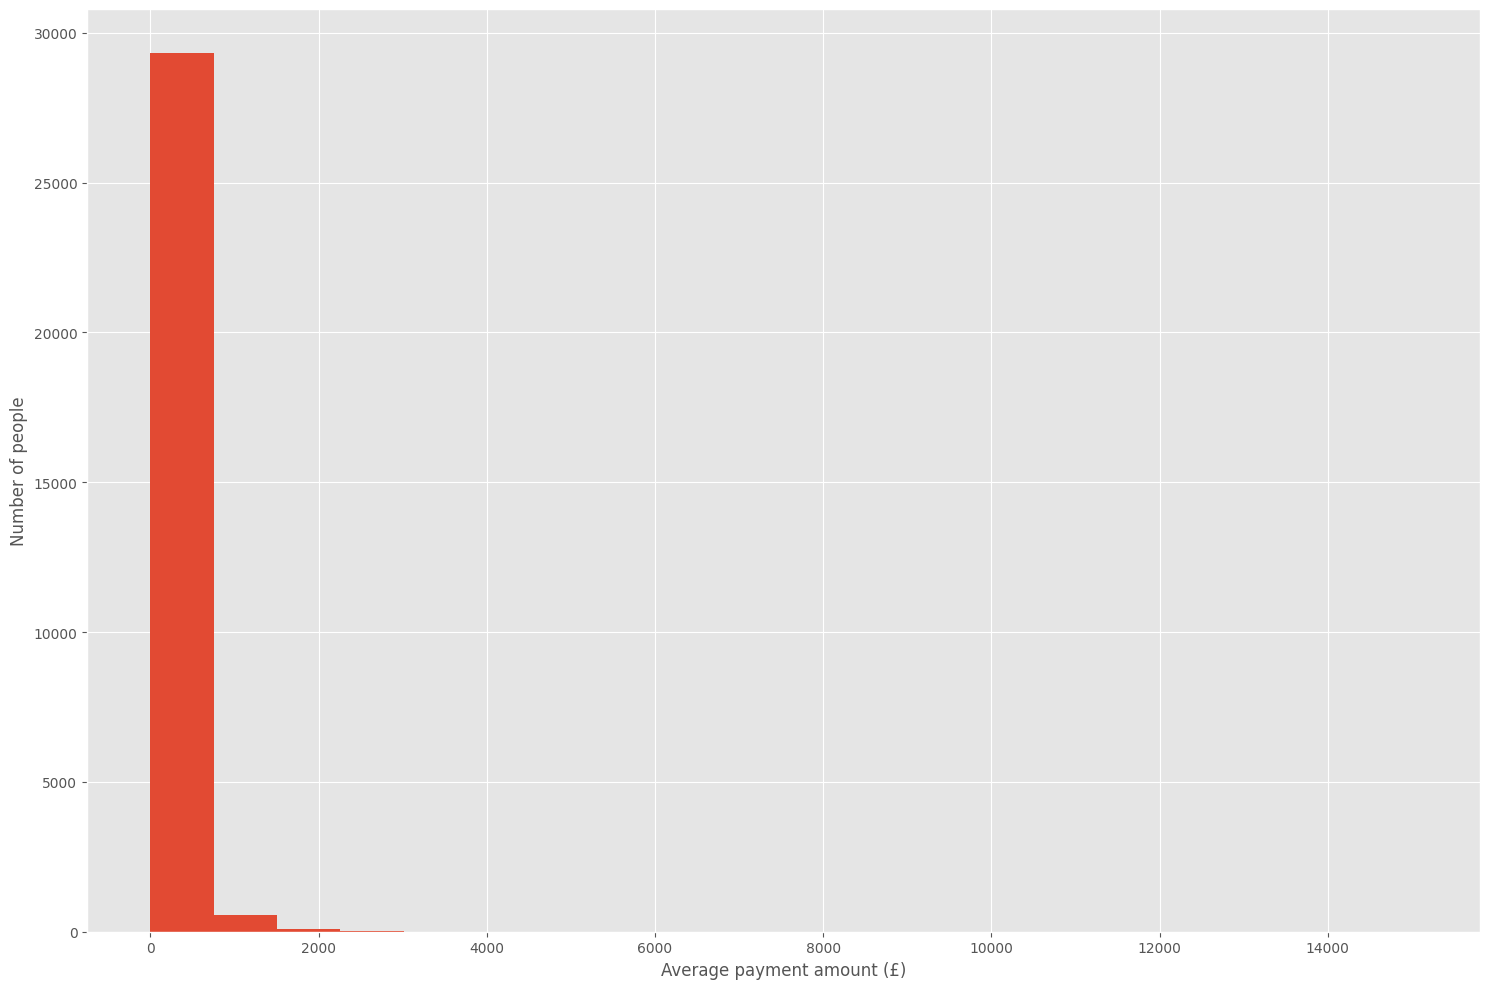

In [14]:
#-- for each person, what's the average payment on their account each month?
plt.rcParams.update({
    'figure.figsize': (15, 10),
    'font.size': 10
})

#-- add your histogram line here!
plt.hist(data[payments].mean(axis=1), 20)

#-- some labelling.
plt.xlabel("Average payment amount (£)")
plt.ylabel("Number of people")

plt.tight_layout()
plt.show()

<span style="font-weight:bold; color:green;">&rarr;  And if you've managed that, let's view one for people's "LIMIT" field, with 50 bins and using the colour purple:</span>

In [15]:
#-- and let's also have a look at the limit balances people have
plt.rcParams.update({
    'figure.figsize': (15, 10),
    'font.size': 10
})

### Task 2e: Explore the Charge-off rate ("DEFAULTED")

Great, we have some good summaries there, and now lets make predictions. First off, let's start with an overarching view of the problem. We want to predict defaulting, so let's answer the following questions:

* How many cases do we have on our dataset to work with?
* What is the breakdown depending on some of the variables available?

Defaulting accounts are 22.12% out of 30000 observations


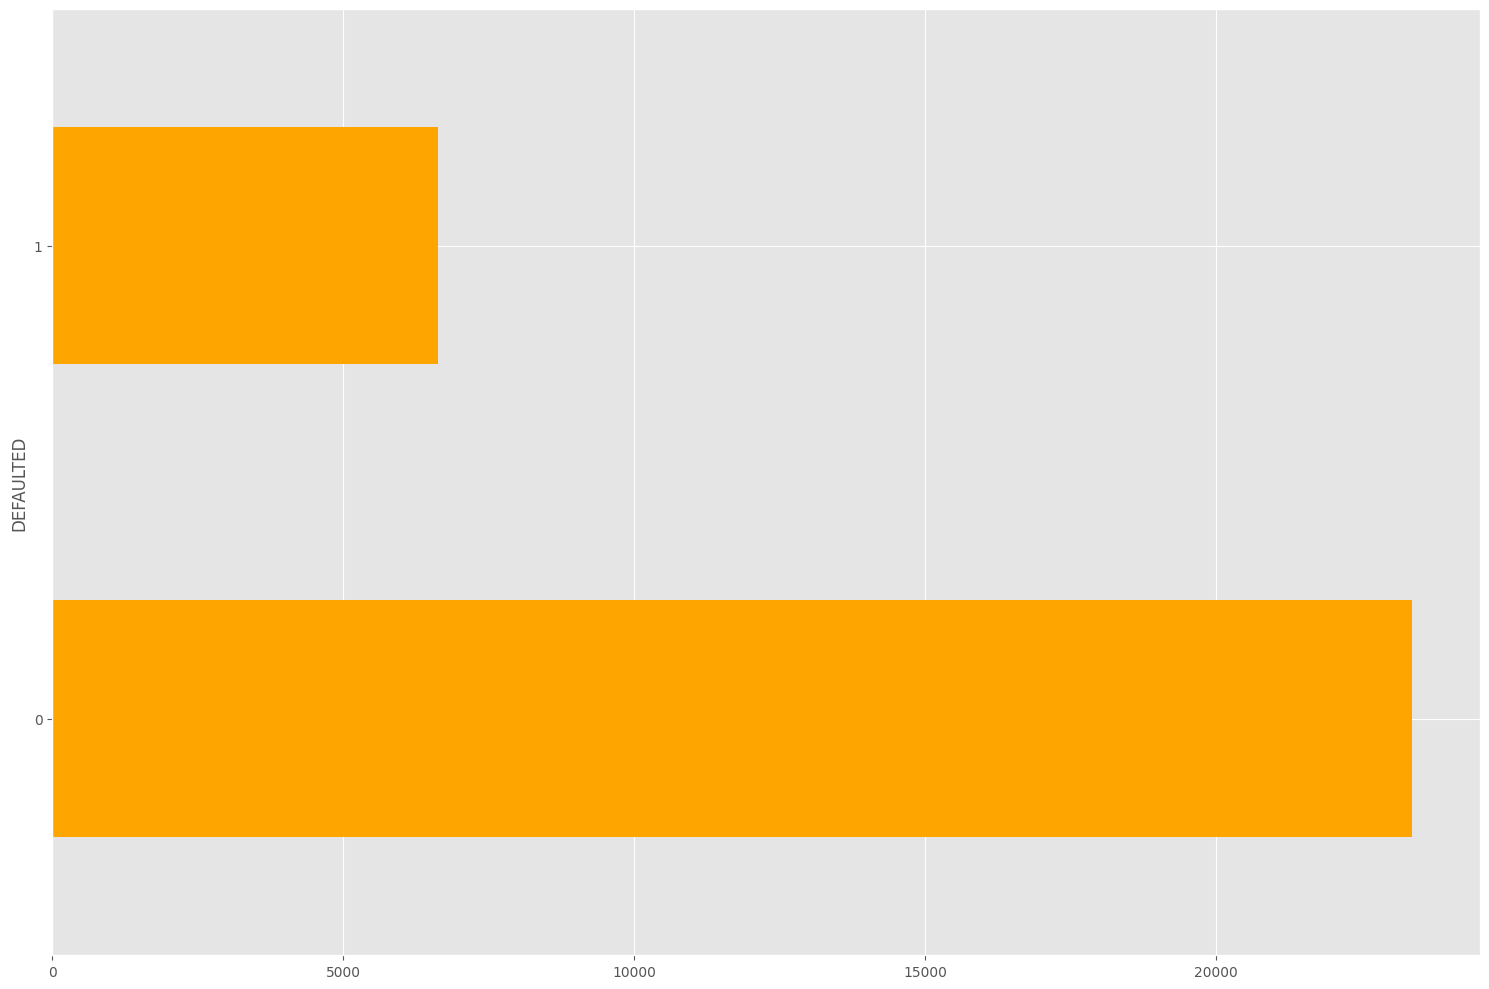

In [16]:
plt.rcParams.update({
    'figure.figsize': (15, 10),
    'font.size': 10
})

#-- group the defaulted variable into its two classes and count them
default_counts = data.groupby(['DEFAULTED']).size()

print("Defaulting accounts are {}% out of {} observations".format(100* default_counts[1]/(default_counts[1]+default_counts[0]), default_counts[1]+default_counts[0]))

#-- consider the different kinds of "plot" in the online documenation and have a play around
p = default_counts.plot(kind='barh', color='orange')

plt.tight_layout()
plt.show()

### Task 2f: Explore some other statistics!
Let's have a look at a number of histograms to see how defaulting is correlated with the categorical variables available:

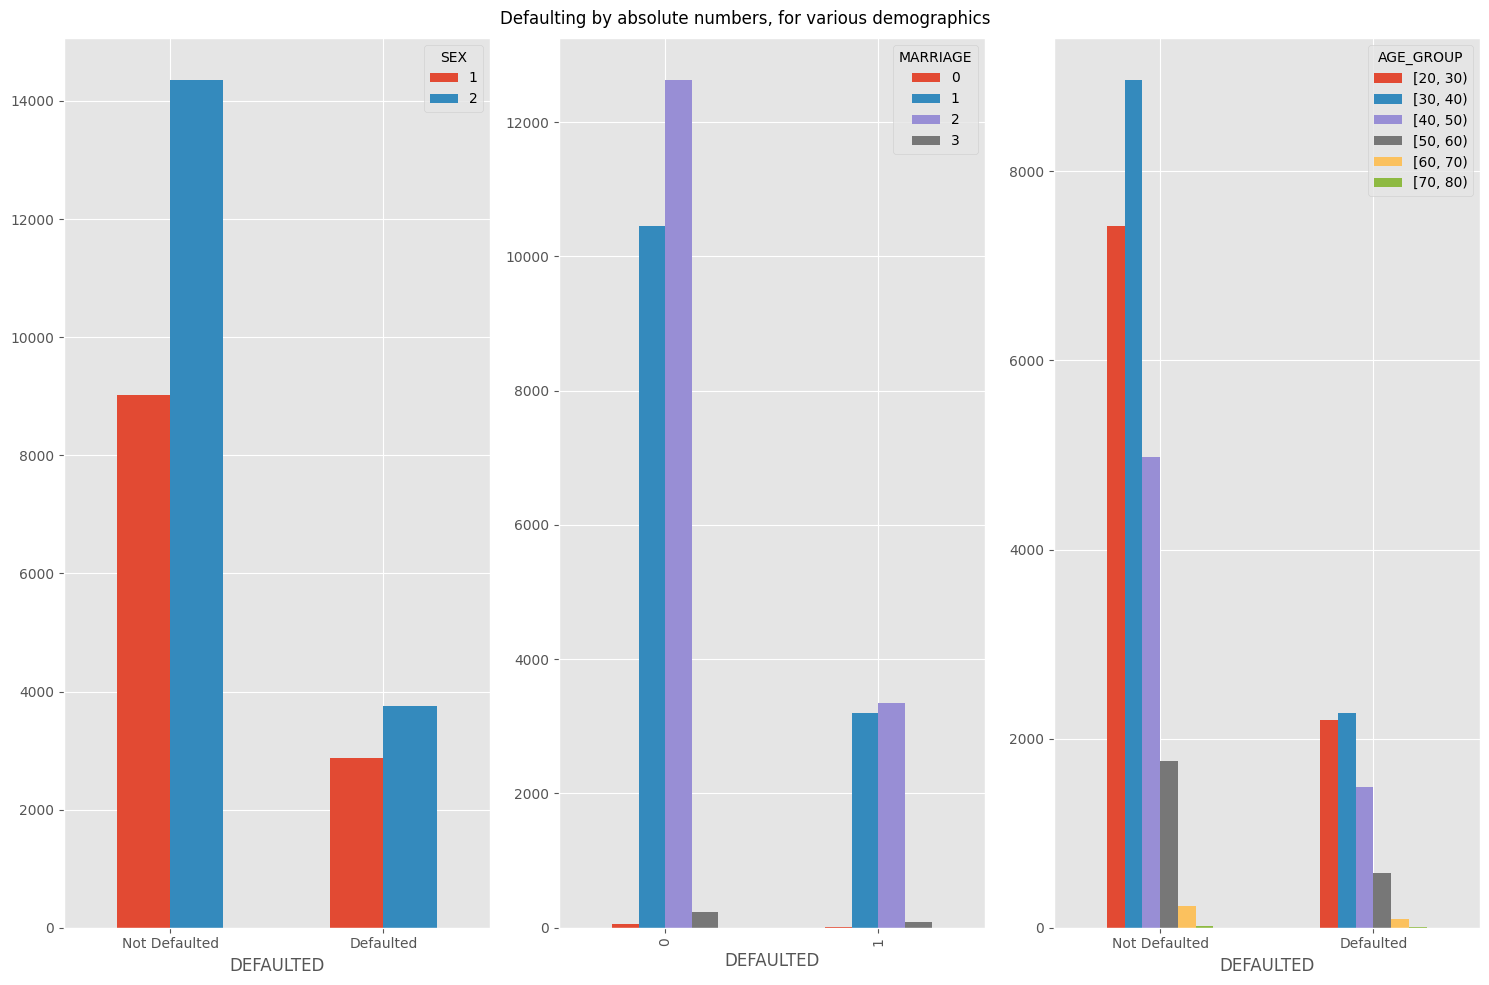

In [18]:
fig, ax = plt.subplots(1,3)

plt.rcParams.update({
    'figure.figsize': (15, 10),
    'font.size': 10
})

fig.suptitle('Defaulting by absolute numbers, for various demographics')

#-- create a plot for split by gender
d = data.groupby(['DEFAULTED', 'SEX'], observed=True).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])
ax[0].set_xticklabels(['Not Defaulted', 'Defaulted'], rotation=0)

#-- create another plot for "MARRIAGE"
d = data.groupby(['DEFAULTED', 'MARRIAGE'], observed=True).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

#-- create a plot for split by "AGE"
data['AGE_GROUP'] = pandas.cut(data['AGE'], range(0, 100, 10), right=False)
d = data.groupby(['DEFAULTED', 'AGE_GROUP'], observed=True).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])
ax[2].set_xticklabels(['Not Defaulted', 'Defaulted'], rotation=0)

plt.tight_layout()
plt.show()

Note how pandas let us easily cut-up the age into categories using the "cut()" function. Remember you never need to memorize these - just know they exist and then refer to prior examples or the web documentation.


> This concludes our refresher of pandas, seaborn and what we looked at in FBA. Time to move on!





### Task 3a: Moving on to Feature Engineering
We now begin to extend what we did previously. When you analyse data from CSVs often it's not about blind feature conversion to values between 0 and 1 - it's about understanding data, and working out how best to input it into your models.

To that end, let's first create some aggregate variables. Use the .mean() and .std() methods which will use a paramater of axis=1 (to indicate that you want the column averaged not the row) to do this below:

<span style="font-weight:bold; color:green;">&rarr; Create the following new features:</span>

In [19]:
X['STATUS_MEAN'] = data[statuses].mean(axis=1)
X['STATUS_STD'] = data[statuses].std(axis=1)

X['BILL_MEAN'] = data[bills].mean(axis=1)
X['BILL_STD'] = data[bills].std(axis=1)

X['PAY_MEAN'] = data[payments].mean(axis=1)
X['PAY_STD'] = data[payments].std(axis=1)

X.describe()

/var/folders/kf/5c3rzd1n3mg01xt7v99dzfvr0000gn/T/ipykernel_17102/564669582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['STATUS_MEAN'] = data[statuses].mean(axis=1)


,LIMIT,SEX,EDUCATION,MARRIAGE,AGE,STATUS_JAN,STATUS_FEB,STATUS_MAR,STATUS_APR,STATUS_MAY,...,PAY_MAR,PAY_APR,PAY_MAY,PAY_JUN,STATUS_MEAN,STATUS_STD,BILL_MEAN,BILL_STD,PAY_MEAN,PAY_STD
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4016.316667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,125.416356,115.825845,115.185303,125.172062,-0.160707,0.428505,925.198430,534.932440,126.605570,139.318044
std,3113.527887,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,422.567075,375.987834,366.679336,426.659179,0.995935,0.529616,1301.406690,690.960920,243.310712,360.154535
min,200.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,-1153.030857,0.021166,0.000000,0.000000
25%,1200.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,9.360000,7.104000,6.060000,2.826000,-0.800000,0.000000,98.238286,90.062100,26.719000,14.768488
50%,3400.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,43.200000,36.000000,36.000000,36.000000,0.000000,0.000000,433.105714,278.818774,57.532000,33.928659
75%,5800.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,108.120000,96.318000,96.756000,96.000000,0.000000,0.894427,1174.766571,697.102335,134.014000,99.046983
max,24000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,21504.960000,14904.000000,10236.696000,12687.984000,6.000000,3.286335,18047.598857,14591.646510,15056.264000,15602.360132


### Task 3b - Examining Variable Importance
While we're here, let's find out what the most important variables are for the problem! To do this, we use a special sklearn command called SelectKBest. This works as follows - remember it, and make sure you understand it, as it's a very useful item to avoid the curse of dimensionality.

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

#-- Let's select the best 5 features - n.b. here we just tell the tool to use the "f_classif" function.
#-- The F-scores are the test statistic for the F-test and they represent the ratio between the explained and the unexplained variance (there are other options such as mutual information).
#-- We don't call that function though, we just supply its name as a parameter.
selector = SelectKBest(score_func=f_classif, k= 5)

#-- having parameterized the tool, let's fit the data
selector_ft = selector.fit_transform(X, Y)

Our model is fit so let's have a look at it's scores:

In [21]:
print(selector.scores_)

[7.23454111e+02 4.79788543e+01 2.35471118e+01 1.77812714e+01
 5.78855582e+00 3.53771497e+03 2.23916914e+03 1.75746644e+03
 1.47684597e+03 1.30459118e+03 1.08540249e+03 1.15805315e+01
 6.04423789e+00 5.94438771e+00 3.09474518e+00 1.37108740e+00
 8.65820292e-01 1.60403810e+02 1.03291524e+02 9.52180109e+01
 9.71880005e+01 9.14298008e+01 8.50890453e+01 2.76521896e+03
 1.90362692e+03 4.81430329e+00 5.11070834e+01 3.17598973e+02
 1.65291839e+02]


The **scores_** attribute just tells us (in order) how important the tool thinks our variables are. To put the names of the most important features in order based on these results, try the following:

In [22]:
import numpy as np
import pandas as pd

# Get feature scores and create a ranked dataframe
feature_scores = pd.DataFrame({
    'Feature_Name': X.columns,
    'F_Score': selector.scores_
})

# Sort by F-Score (descending) and display top 20
feature_scores_sorted = feature_scores.sort_values(
    by='F_Score',
    ascending=False
).head(20)

print(feature_scores_sorted)

   Feature_Name      F_Score
5    STATUS_JAN  3537.714970
23  STATUS_MEAN  2765.218964
6    STATUS_FEB  2239.169136
24   STATUS_STD  1903.626925
7    STATUS_MAR  1757.466444
8    STATUS_APR  1476.845967
9    STATUS_MAY  1304.591176
10   STATUS_JUN  1085.402485
0         LIMIT   723.454111
27     PAY_MEAN   317.598973
28      PAY_STD   165.291839
17      PAY_JAN   160.403810
18      PAY_FEB   103.291524
20      PAY_APR    97.188000
19      PAY_MAR    95.218011
21      PAY_MAY    91.429801
22      PAY_JUN    85.089045
26     BILL_STD    51.107083
1           SEX    47.978854
2     EDUCATION    23.547112


We can see the STATUS temporal variables appear important, as do how volatile it is. If we wanted to reduce our features then we could use this information to select the best variables (and avoid the curse of dimensionality). For now, let's leave them all in, but you may want to try building your models again at some point with fewer variables, to see if it improves results.

### Task 4a: Building your predictive models - including a Gradient Boosted Machine!
We have our features and some understanding of them. Now let's do some prediction.

You should be well versed in this at this point, so I'm going to let you have a go yourself with the following classifiers (note this may take jupyter some time to run):

* dummy (for a baseline comparison - very important!)
* logistic regression (What capital one previously used)
* AdaBoost (the GBM capital one now uses)
* a decision tree (just to serve as comparison)

Good luck, and ask for help if needed (and you will likely have to wait a couple of minutes for this to complete!).

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import ensemble
from sklearn import dummy
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#-- setup our testing strategy (go for 10 folds)
folds = KFold(n_splits=10, shuffle=True, random_state=0)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#-- test a logistic regression model
lr_pipeline = Pipeline([('scaler', StandardScaler()), ('feature_selection', SelectKBest(score_func=f_classif, k=20)), ('classifier', LogisticRegression(max_iter=1000, random_state=42))])
lr_scores = cross_val_score(lr_pipeline, X, Y, cv=folds, scoring = 'accuracy')
print(f"Mean Logistic Regression Accuracy: {np.mean(lr_scores):.2f}")

Mean Logistic Regression Accuracy: 0.80


In [25]:
#-- test a decision tree model with a max_depth of 20 and min_samples_leaf of 7 (check the sklearn documentation for examples of tree)
dt_pipeline = Pipeline([('feature_selection', SelectKBest(score_func=f_classif, k=20)), ('classifier', tree.DecisionTreeClassifier(max_depth=20, min_samples_leaf=7, random_state=42))])
dt_scores = cross_val_score(dt_pipeline, X, Y, cv=folds, scoring = 'accuracy')
print(f"Mean Decision Tree Accuracy: {np.mean(dt_scores):.2f}")

Mean Decision Tree Accuracy: 0.77


In [28]:
#-- test an AdaBoost model
ab_pipeline = Pipeline([('scaler', StandardScaler()), ('feature_selection', SelectKBest(score_func=f_classif, k=20)),  ('classifier', ensemble.AdaBoostClassifier(n_estimators=300, learning_rate=1))])
ab_scores = cross_val_score(ab_pipeline, X, Y, cv=folds)
print(f"Mean AdaBoost Accuracy: {np.mean(ab_scores):.2f}")

Mean AdaBoost Accuracy: 0.82


In [29]:
#-- and so we can guage how well we are doing overall run a baseline dummy model (adding the scoring line!)
dc_pipeline = Pipeline([('scaler', StandardScaler()), ('feature_selection', SelectKBest(score_func=f_classif, k=20)), ('classifier', dummy.DummyClassifier())])
dc_scores = cross_val_score(dc_pipeline, X, Y, cv=folds, scoring = 'accuracy')
print(f"Baseline Accuracy: {np.mean(dc_scores):.2f}")

Baseline Accuracy: 0.78


Well done. Which was the winner? Did AdaBoost win? (it should have shown you the best accuracy, but if not don't panic - it will do if you sculpt it correctly and give it the right features). And note we have done a baseline to show how much improvement is made - giving us a strong argument that the company should be using our model.

### Task 4b - Undertanding why Adaboost won, when a decision tree was so poor:

The reason that we have got a better model than logistic regression for the business here, is not simply due to using an ensemble method (which traditionally bags data, giving individual predictors only a sample of the original data to ensure they generalize), but because we are *boosting*. Each simple classifier tries to fix the mistakes of the one that preceded it sequentially.

This is possible because we weight the likelihood of "mistaken predictions" being sent to the next classifier's training data, to ensure it is more likely to focus on those problems! Gradually the overall model get's better and better - in our 300 small stumps each trying to fix the issues of the one that preceded it:


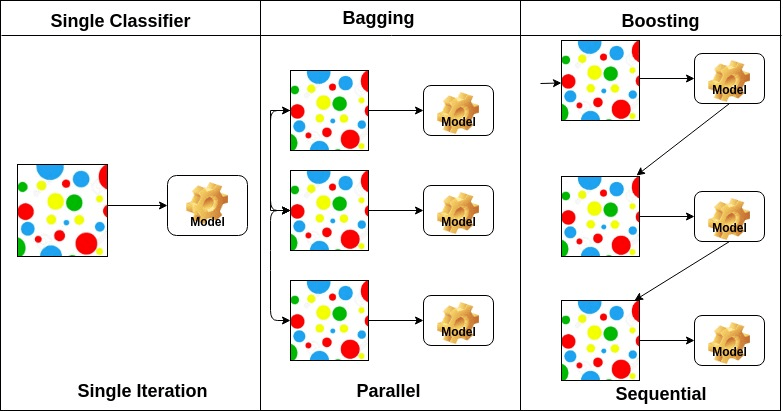

In [30]:
from IPython.display import Image
Image('boosting.png')

# Get all parameters with their current values

For the classifiers we tested earlier, we used only a few parameters. Have a go at displaying all parameters and their default values for the above classification models, following the example below:

In [31]:
dt = tree.DecisionTreeClassifier()
print("Default parameters: ", dt.get_params())

# View full documentation
help(tree.DecisionTreeClassifier)

Default parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(
 |      *,
 |      criterion='gini',
 |      splitter='best',
 |      max_depth=None,
 |      min_samples_split=2,
 |      min_samples_leaf=1,
 |      min_weight_fraction_leaf=0.0,
 |      max_features=None,
 |      random_state=None,
 |      max_leaf_nodes=None,
 |      min_impurity_decrease=0.0,
 |      class_weight=None,
 |      ccp_alpha=0.0,
 |      monotonic_cst=None
 |  )
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 

### Task 4c: Statistical Testing - let's be sure

Now, we haven't created a confusion matrix here, and are just considering classification accuracy. But a win is a win. However, the results should have been close in the above example - let's make sure this is a *real* win, and isn't just coming from random chance that the test sets nicely suited Adaboost.

To do that we can run a statistical test, as mentioned in the lecture slides...

Running a statistical test is easy as pie in Python thanks to the "scipy" module - we just call the appropriate test from that statistics module, and compare our results for each fold for logistic regression (lr_scores) against those for adaboost (ab_scores).

Let's try a Paired t-test first, and we will make a justifiable target of being 95% confident that our results are real differences between the models (So we need a p-value that is less than 0.05):

In [32]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(lr_scores, ab_scores)
print(f"t-tests p-value: {np.round(p):.4f}")

t-tests p-value: 0.0000


Our p-value is way below 0.05, meaning that we have rejected our null hypothesis that the models are likely drawing results from the same distribution - their difference appears real (within a 5% confidence).

But wait - *there is an important problem here*. Recall from the lecture that the problem here, is that the paired t-test performed above assumes that all the results we are comparing (for our 10 models, each created to assess each of the 10 "fold" test data on) are supposed to be independent. But they are not! The models are trained using ~90% of the same data each time, so we have broken that assumption.

### Task 4d: Apply a non-parametric test instead
While sometimes you can get away with doing this, its better to be safe than sorry. So instead let's use a non-parametric test that makes no such assumptions. I recommend you use the **wilcoxon test**, which is illustrated below:

In [33]:
from scipy.stats import wilcoxon

stat_w, p_w = wilcoxon(lr_scores, ab_scores)
print(f"t-tests p-value: {np.round(p_w):.4f}")

t-tests p-value: 0.0000


Super! Our p value remains lower than 0.05 (ignore any warnings you get - checks for normality are not relevent to non-parametric models).

So, we remain confident that our Adaboost model is better than the logistic regression, and this has not occurred just by random chance, but is to do with the generalization power - and hence real-world business effectivenes - of the model.

AdaBoost is a classic boosting algorithm. More modern boosting frameworks include XGBoost. Following the examples above, build a predictive model using XGBoost and evaluate it against AdaBoost.  

### Task 5: Assessing your progress
Review what you have covered in this exercise. You should now be able to understand:

* Loading in your data and splitting data into a test and training set.
* The ability to use temporal data in "bins" as individual features (e.g. STATUS_JAN, STATUS_FEB, ...).
* To create summary statistics via pandas **groupby()** function.
* To visualize those statistics as graphs using pandas inbuilt plot functions (as an alternative to calling matplotlib directly)
* To create several test predictive models, including **Adaboost**, a boosted decision tree technique.
* To set up a validation strategy with sklearn's **KFolds()** tool.
* To perform statistical testing to ensure results are meaningful.

Remember that it is not necessarily memorizing these items which is key - but having an understanding of how to use them as a process, knowing how to refind examples of their usage, and how to look up documentation when you are not sure.